# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## HSROpen

In [ ]:
""" 

df.drop(columns=['id', 'computed_hsr', 'notes', 'collector'], inplace=True)

real_numerical_cols = ['hsr_on_pack', 'nutrient_energy_kj', 'protein_g_per_100g', 'fat_g_per_100g', 'sat_fat_g_per_100g', 'kcal_per_100g', 'carbohydrates', 'sugars_g_per_100g', 'sodium_mg_per_100g', 'fiber_g_per_100g']
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
to_modify_col_names_list = []
for col_name in real_numerical_cols:
    if col_name not in numerical_cols:
        to_modify_col_names_list.append(col_name)
to_modify_col_names_list

def transform_com_to_dots(x):
    if isinstance(x, str):
        return x.replace(',', '.').replace(';', '.')
    return x

for col_name in to_modify_col_names_list:
    df[col_name] = df[col_name].apply(transform_com_to_dots).astype(float)

df.to_csv('Data/OpenHSR.csv', index=False)
"""

In [84]:
df = pd.read_csv('Data/OpenHSR.csv')

# Exploration

In [71]:
df.columns

Index(['product_name', 'Size g', 'Product type', 'category', 'country',
       'retailer', 'HSR', 'nutrient_energy_kj', 'protein_g_per_100g',
       'fat_g_per_100g', 'sat_fat_g_per_100g', 'carbohydrates',
       'sugars_g_per_100g', 'sodium_mg_per_100g', 'fiber_g_per_100g',
       'ingredients_text', 'date_collected', 'allergen', 'data_source',
       'kcal_per_100g'],
      dtype='object')

In [72]:
len(df)

246

<Axes: xlabel='HSR', ylabel='Count'>

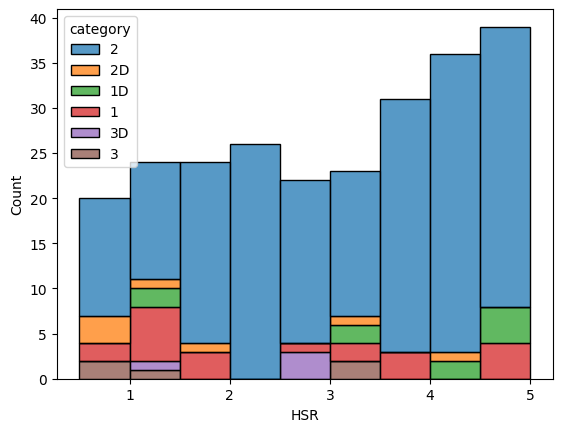

In [73]:
sns.histplot(data=df, x='HSR', hue='category', multiple='stack')

C:\Users\Valentin\AppData\Local\Temp\ipykernel_37168\434538716.py:1: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.histplot(data=df.sort_values('category'), x='HSR', hue='category', multiple='stack', bins=9, palette=sns.color_palette("Set2", as_cmap=False))


<Axes: xlabel='HSR', ylabel='Count'>

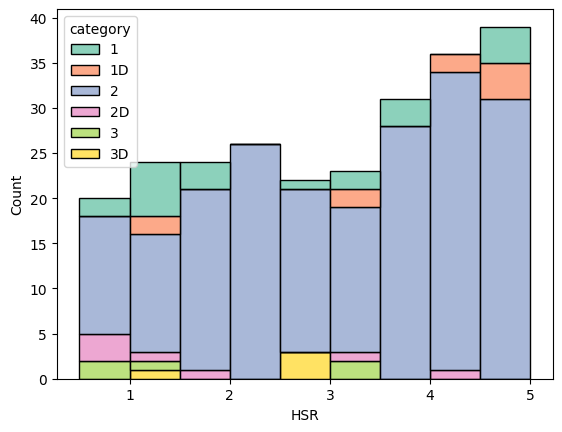

In [89]:
sns.histplot(data=df.sort_values('category'), x='HSR', hue='category', multiple='stack', bins=9, palette=sns.color_palette("Set2", as_cmap=False))

<Axes: xlabel='category', ylabel='Count'>

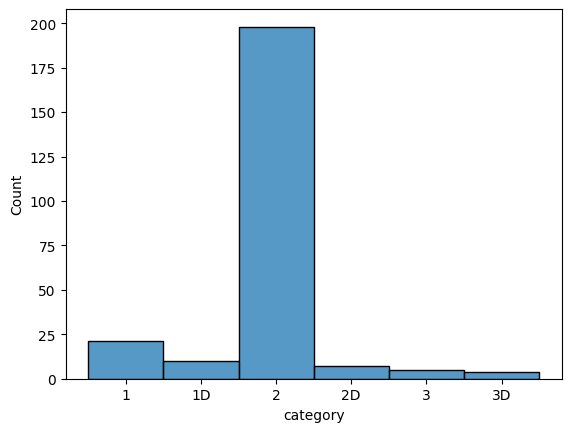

In [83]:
sns.histplot(data=df.sort_values('category'), x='category', log_scale=True)

<Axes: xlabel='kcal_per_100g', ylabel='Density'>

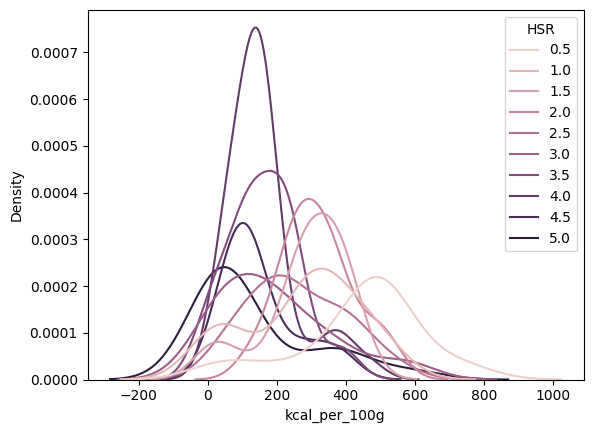

In [74]:
sns.kdeplot(data=df, x='kcal_per_100g', hue='HSR')

<Axes: xlabel='sugars_g_per_100g', ylabel='Density'>

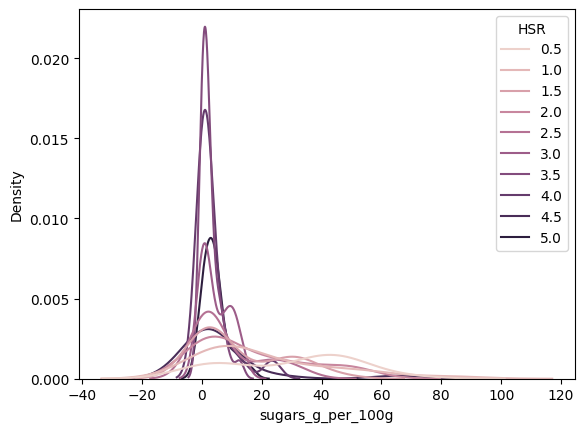

In [75]:
sns.kdeplot(data=df, x='sugars_g_per_100g', hue='HSR') 

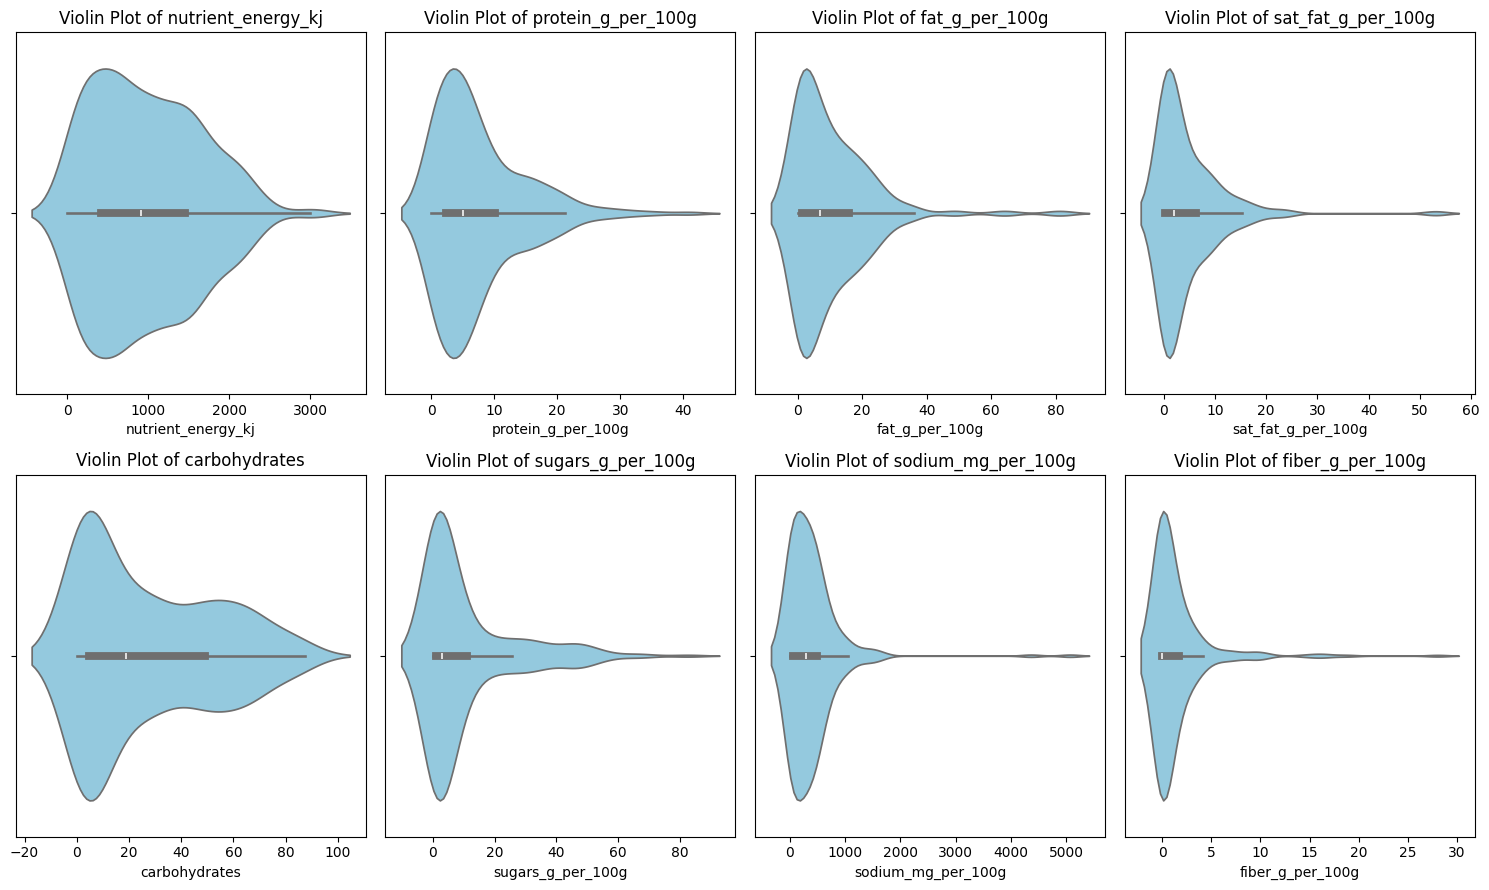

In [77]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 9))

# Loop through numeric columns and plot each
for i, col in enumerate(real_numerical_cols[1:], 0):
    sns.violinplot(x=df[col], color='skyblue', ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(f'Violin Plot of {col}')
    ax[i//4, i%4].set_xlabel(col)

plt.tight_layout()
plt.show()